## Research Question 1: Where and when to establish a startup?


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import plotly.express as px
import pycountry #needed to convert country code into country name
 

pd.set_option('display.max_columns', 500)

In [3]:
# Loading olympic datafiles into DataFrames

startup_df = pd.read_csv('big_startup_secsees_dataset 2.csv')
startup_df = startup_df.loc[startup_df['funding_total_usd'] != '-',:]

In [4]:
# Creating functions needed later

def convert_date(date_str):
    try:
        date = pd.to_datetime(date_str, format='%Y-%m-%d')
        if 1900 <= date.year <= 2050:
            return date
        else:
            # Handle out-of-range years or invalid dates as needed
            return None  # Or any other action (e.g., logging, replacing with NaN)
    except ValueError:
        return None  # Or handle other parsing issues
    
def time_delta_to_days(td):
    return td.days

def time_delta_to_years(td):
    return td.years


def convert_country_code_to_name(country_code):
    try:
        country = pycountry.countries.get(alpha_3=country_code)
        if country:
            return country.name
        else:
            return "Country not found"
    except LookupError:
        return "Lookup error occurred"

In [5]:
startup_df.shape

(53583, 14)

In [6]:
startup_df.nunique(axis=0)

permalink            53583
name                 53409
homepage_url         50119
category_list        23368
funding_total_usd    18895
status                   4
country_code           134
state_code             302
region                1045
city                  4300
funding_rounds          19
founded_at            3523
first_funding_at      4569
last_funding_at       4237
dtype: int64

In [7]:
startup_df.dtypes

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object

In [9]:
startup_df.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01


In [11]:
# Pre-processing

#Change date columns from string to datetime
startup_df['founded_at']= startup_df['founded_at'].map(convert_date)
startup_df['first_funding_at']= startup_df['first_funding_at'].map(convert_date)
startup_df['last_funding_at'] = startup_df['last_funding_at'].map(convert_date)

#Create year columns
startup_df['founded_year'] = pd.DatetimeIndex(startup_df['founded_at']).year
startup_df['first_funding_year'] = pd.DatetimeIndex(startup_df['first_funding_at']).year
startup_df['last_funding_year'] = pd.DatetimeIndex(startup_df['last_funding_at']).year

#Create month columns
startup_df['founded_month'] = pd.DatetimeIndex(startup_df['founded_at']).month
startup_df['first_funding_month'] = pd.DatetimeIndex(startup_df['first_funding_at']).month
startup_df['last_funding_month'] = pd.DatetimeIndex(startup_df['last_funding_at']).month


#Create duration columns being funding rounds and founding (days)
startup_df['days_to_first_funding'] = (startup_df.first_funding_at - startup_df.founded_at).map(time_delta_to_days)
startup_df['days_between_first_and_recent_funding'] = (startup_df.last_funding_at - startup_df.first_funding_at).map(time_delta_to_days)
startup_df['days_between_founding_and_recent_funding'] = (startup_df.last_funding_at - startup_df.founded_at).map(time_delta_to_days)


#Create duration columns being funding rounds and founding (years)
startup_df['year_to_first_funding'] = (startup_df['days_to_first_funding'] / 365).astype(float)
startup_df['year_between_first_and_recent_funding'] = (startup_df['days_between_first_and_recent_funding'] / 365).astype(float)
startup_df['years_between_founding_and_recent_funding'] = (startup_df['days_between_founding_and_recent_funding'] / 365).astype(float)

#Calculate total funding normalized by number of rounds of funding
startup_df['funding_total_usd']= startup_df['funding_total_usd'].astype(float)
startup_df['total_funding_normalized_by_rounds'] = startup_df['funding_total_usd'] / startup_df['funding_rounds']

#Creating a total funding normalized by days from first to recent funding
startup_df['total_funding_normalized_by_rounds'] = startup_df['funding_total_usd'] / startup_df['days_between_first_and_recent_funding']

#Creating a country column
startup_df['country_name'] = startup_df['country_code'].map(convert_country_code_to_name)

#Converting category_list to string
startup_df['category_list']= startup_df['category_list'].astype(str)


#Capitalizing status names
startup_df['status'] = startup_df['status'].str.capitalize().str.replace('Ipo', 'IPO')


startup_df.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,first_funding_year,last_funding_year,founded_month,first_funding_month,last_funding_month,days_to_first_funding,days_between_first_and_recent_funding,days_between_founding_and_recent_funding,year_to_first_funding,year_between_first_and_recent_funding,years_between_founding_and_recent_funding,total_funding_normalized_by_rounds,country_name
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,Operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,NaN,2015.0,2015.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN,0.000000,NaN,inf,India
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,Operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,2014.0,2014.0,2014.0,9.0,3.0,10.0,-187.0,227.0,40.0,-0.512329,0.621918,0.109589,3083.700441,United States
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,Operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30,NaN,2014.0,2014.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN,0.000000,NaN,inf,Lookup error occurred
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,Operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2007.0,2008.0,2008.0,1.0,3.0,3.0,443.0,0.0,443.0,1.213699,0.000000,1.213699,inf,China
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,Operating,HKG,NaN,Hong Kong,Hong Kong,1,NaT,2014-07-01,2014-07-01,NaN,2014.0,2014.0,NaN,7.0,7.0,NaN,0.0,NaN,NaN,0.000000,NaN,inf,Hong Kong


In [13]:
startup_df.shape #doubled the number of columns via feature engineering

(53583, 28)

<Axes: ylabel='country_name'>

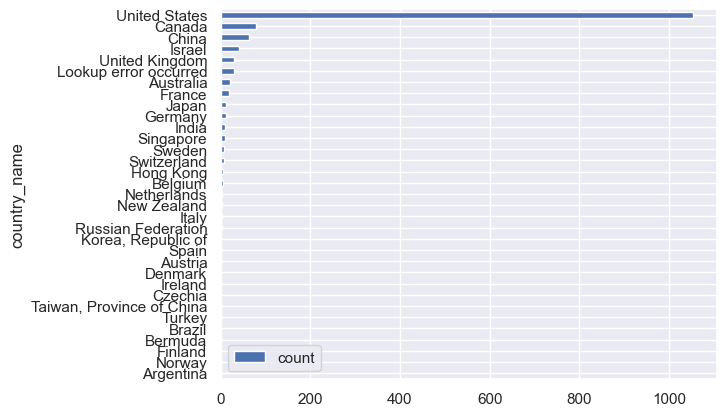

In [15]:
# What countries were part of the IPO companies
sns.set_theme(style="darkgrid")

status_country_group = startup_df.loc[startup_df['status'] == 'IPO', :].groupby(['status','country_name'])[['permalink']].count().reset_index().rename(columns={'permalink': 'count'}).sort_values(by = 'count')
status_country_group.plot.barh(x = 'country_name', y = 'count')

